<a href="https://colab.research.google.com/github/aekanun2020/Data-Analytics-using-Python/blob/main/Python_Pandas_ScikitLearn_RegressionwithEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
! wget https://s3.amazonaws.com/imcbucket/data/flights/2008.csv

--2022-09-04 07:35:52--  https://s3.amazonaws.com/imcbucket/data/flights/2008.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.94.214
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.94.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 689413344 (657M) [binary/octet-stream]
Saving to: ‘2008.csv’

2008.csv            100%[===================>] 657.48M  23.0MB/s    in 23s     

2022-09-04 07:36:16 (28.2 MB/s) - ‘2008.csv’ saved [689413344/689413344]



In [4]:
! wc -l 2008.csv

7009729 2008.csv


In [5]:
f = "2008.csv"
num_lines = sum(1 for l in open(f))
size = int(num_lines / 100)
import random
skip_idx = random.sample(range(1, num_lines), num_lines - size)
raw_pd = pd.read_csv(f, skiprows=skip_idx)

In [6]:
#raw_pd = pd.read_csv("2008.csv")

In [7]:
raw_pd.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,726.0,720,958.0,1020,WN,3319,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,1703.0,1645,33.0,35,WN,767,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2134.0,2040,2343.0,2300,WN,2550,...,3.0,14.0,0,NaN,0,12.0,0.0,0.0,0.0,31.0
3,2008,1,3,4,2017.0,1945,2144.0,2105,WN,400,...,4.0,13.0,0,NaN,0,2.0,0.0,7.0,0.0,30.0
4,2008,1,3,4,634.0,630,1133.0,1140,WN,3495,...,4.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [8]:
raw_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70096 entries, 0 to 70095
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               70096 non-null  int64  
 1   Month              70096 non-null  int64  
 2   DayofMonth         70096 non-null  int64  
 3   DayOfWeek          70096 non-null  int64  
 4   DepTime            68712 non-null  float64
 5   CRSDepTime         70096 non-null  int64  
 6   ArrTime            68566 non-null  float64
 7   CRSArrTime         70096 non-null  int64  
 8   UniqueCarrier      70096 non-null  object 
 9   FlightNum          70096 non-null  int64  
 10  TailNum            69245 non-null  object 
 11  ActualElapsedTime  68541 non-null  float64
 12  CRSElapsedTime     70085 non-null  float64
 13  AirTime            68541 non-null  float64
 14  ArrDelay           68541 non-null  float64
 15  DepDelay           68712 non-null  float64
 16  Origin             700

In [9]:
raw_pd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,70096.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,70096.0,6.371219,3.400091,1.0,3.0,6.0,9.0,12.0
DayofMonth,70096.0,15.748673,8.785825,1.0,8.0,16.0,23.0,31.0
DayOfWeek,70096.0,3.926857,1.990476,1.0,2.0,4.0,6.0,7.0
DepTime,68712.0,1334.794083,477.531768,1.0,930.0,1325.0,1729.0,2400.0
CRSDepTime,70096.0,1327.413975,463.853482,1.0,930.0,1320.0,1715.0,2359.0
ArrTime,68566.0,1482.236837,505.918749,1.0,1108.0,1513.0,1910.0,2400.0
CRSArrTime,70096.0,1496.252240,483.310564,1.0,1115.0,1518.0,1910.0,2400.0
FlightNum,70096.0,2209.826994,1954.370583,1.0,617.0,1569.0,3469.0,8940.0
ActualElapsedTime,68541.0,126.875943,69.900705,18.0,76.0,109.0,156.0,655.0


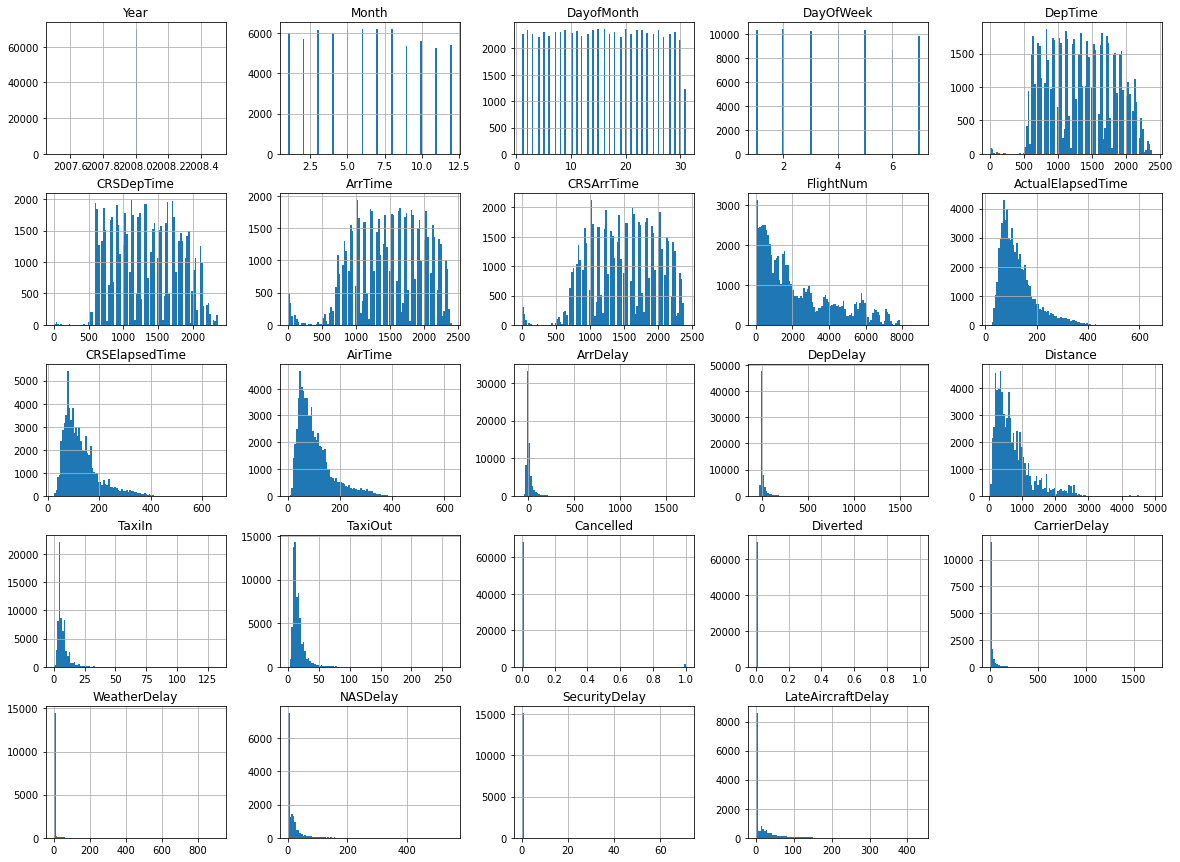

In [10]:
raw_pd.hist(bins=100, figsize=(20,15))
plt.show()

In [11]:
def t_timeperiod(origin):
    if origin is None:
        period = None
    elif origin > 0 and origin < 600:
        period = '00.01-05.59'
    elif origin >= 600 and origin <=1200:
        period = '06.00-11.59'
    elif origin >= 1200 and origin <= 1800:
        period = '12.00-17.59'
    elif origin >= 1800 and origin <= 2400:
        period = '18.00-24.00'
    else:
        period = 'NA'
    return period

In [12]:
raw_pd['DepTime'] = raw_pd['DepTime'].apply(lambda x:t_timeperiod(x))

In [13]:
max_distance = raw_pd['Distance'].max()
min_distance = raw_pd['Distance'].min()

In [14]:
max_ArrDelay = raw_pd['ArrDelay'].max()
min_ArrDelay = raw_pd['ArrDelay'].min()

In [15]:
def t_normalized_distance(origin):
    if origin is None:
        return None
    else:
        return ((origin-min_distance)/(max_distance-min_distance))

In [16]:
def t_normalized_ArrDelay(origin):
    if origin is None:
        return None
    else:
        return ((origin-min_ArrDelay)/(max_ArrDelay-min_ArrDelay))

In [17]:
raw_pd['Distance'] = raw_pd['Distance'].apply(lambda x:t_normalized_distance(x))

In [18]:
raw_pd['ArrDelay'] = raw_pd['ArrDelay'].apply(lambda x:t_normalized_ArrDelay(x))

In [19]:
features_pd = raw_pd[['UniqueCarrier','Origin','Dest',\
        'DepTime','TaxiOut','TaxiIn','DepDelay',\
        'DayOfWeek','Distance','ArrDelay']]

In [20]:
final_pd = features_pd.dropna()

In [21]:
final_pd.count()

UniqueCarrier    68541
Origin           68541
Dest             68541
DepTime          68541
TaxiOut          68541
TaxiIn           68541
DepDelay         68541
DayOfWeek        68541
Distance         68541
ArrDelay         68541
dtype: int64

In [22]:
features_pd.head(20)

,UniqueCarrier,Origin,Dest,DepTime,TaxiOut,TaxiIn,DepDelay,DayOfWeek,Distance,ArrDelay
0,WN,ISP,PBI,06.00-11.59,8.0,4.0,6.0,4,0.207057,0.026464
1,WN,LAS,MHT,12.00-17.59,9.0,4.0,18.0,4,0.471507,0.037725
2,WN,LAS,PDX,18.00-24.00,14.0,3.0,54.0,4,0.148246,0.063063
3,WN,LAS,SJC,18.00-24.00,13.0,4.0,32.0,4,0.071994,0.060811
4,WN,LAX,MCI,06.00-11.59,6.0,4.0,4.0,4,0.270128,0.034910
5,WN,LAX,SMF,12.00-17.59,8.0,4.0,51.0,4,0.069357,0.060811
6,WN,LIT,HOU,12.00-17.59,5.0,2.0,12.0,4,0.073413,0.041667
7,WN,MCO,BWI,18.00-24.00,14.0,1.0,79.0,4,0.153316,0.082207
8,WN,MDW,FLL,06.00-11.59,7.0,7.0,14.0,4,0.230176,0.038288
9,WN,MDW,FLL,18.00-24.00,15.0,4.0,95.0,4,0.230176,0.084459


In [23]:


#raw_pd.isnull().sum()
#nullCol_series = raw_pd.isnull().sum()
#notNull_list = list(nullCol_series[nullCol_series == 0].index)
#notNull_list
#requiredCol_list = ['TaxiIn','TaxiOut','ArrDelay']
#selectedCol_list = notNull_list + requiredCol_list
#noNull_pd = raw_pd.loc[:,selectedCol_list].dropna()
#noNull_pd.isnull().sum()
#noNull_pd.describe()
#noNull_pd.info()

In [24]:
#final_pd = noNull_pd

In [25]:
import pandas as pd
from seaborn import load_dataset
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [26]:
train_df = final_pd.sample(frac=0.8,random_state=123)

In [27]:
test_df = final_pd.drop(train_df.index)

In [28]:
train_df.count()

UniqueCarrier    54833
Origin           54833
Dest             54833
DepTime          54833
TaxiOut          54833
TaxiIn           54833
DepDelay         54833
DayOfWeek        54833
Distance         54833
ArrDelay         54833
dtype: int64

In [29]:
test_df.count()

UniqueCarrier    13708
Origin           13708
Dest             13708
DepTime          13708
TaxiOut          13708
TaxiIn           13708
DepDelay         13708
DayOfWeek        13708
Distance         13708
ArrDelay         13708
dtype: int64

In [30]:
train_labels = train_df.filter(['ArrDelay'])
train_df = train_df.loc[:, train_df.columns != 'ArrDelay']

In [31]:
type(train_labels)

pandas.core.frame.DataFrame

In [32]:
test_labels = test_df.filter(['ArrDelay'])
test_df = test_df.loc[:, test_df.columns != 'ArrDelay']

In [33]:
X_train = train_df
X_test = test_df
y_train = train_labels
y_test = test_labels

In [34]:
categorical = list(X_train.select_dtypes('object').columns)
print(f"Categorical columns are: {categorical}")

numerical = list(X_train.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")

Categorical columns are: ['UniqueCarrier', 'Origin', 'Dest', 'DepTime']
Numerical columns are: ['TaxiOut', 'TaxiIn', 'DepDelay', 'DayOfWeek', 'Distance']


In [35]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [36]:
# Define custom transformer
class ColumnSelector(BaseEstimator, TransformerMixin):
    """Select only specified columns."""
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.columns]

# Define categorical pipeline
cat_pipe = Pipeline([('selector', ColumnSelector(categorical)),
                     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                     ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])

# Define numerical pipeline
num_pipe = Pipeline([('selector', ColumnSelector(numerical))
                     #('imputer', SimpleImputer(strategy='median')),
                     #('scaler', MinMaxScaler())
                    ])

# Combine categorical and numerical pipeline
preprocessor = FeatureUnion(transformer_list=[('cat', cat_pipe),
                                              ('num', num_pipe)])

# Model Training
pipe = Pipeline(steps=[('preprocessor', preprocessor),
              ('model', DecisionTreeRegressor(max_depth=None))])
pipeline_model = pipe.fit(X_train, y_train)

In [37]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

predictions = pipeline_model.predict(X_test)
print("\t RMSE:", mean_squared_error(y_test, predictions, squared=False))
print("\t R2 score:", r2_score(y_test, predictions))

	 RMSE: 0.007642128084106931
	 R2 score: 0.890558449394486
